# SCRIPT 2: Exploratory Data Analysis and Visualization

## Load packages

In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Intermediate Dataset output from Script 1:

In [3]:
df = pd.read_excel('./acupuncture_analysis_input.xlsx')

In [4]:
df.head()

,id,age,sex,acupuncturist,group,migraine,chronicity,delta5,globaldelta,f1,f5,pf1,pf5,ef1,ef5,changeinpainmeds,totaldos
0,100,47,1,12,1,1,35,NaN,NaN,8.0,0.00,100.0,NaN,80.0,NaN,NaN,NaN
1,101,52,1,12,0,1,8,NaN,NaN,4.0,0.00,25.0,NaN,35.0,NaN,NaN,6.0
2,104,32,1,12,0,1,14,0.666667,NaN,12.0,13.33,95.0,100.0,60.0,65.0,21.0,3.0
3,105,53,1,9,0,1,10,NaN,NaN,21.0,0.00,85.0,NaN,55.0,NaN,NaN,NaN
4,108,56,1,9,0,1,40,-6.749999,NaN,14.0,15.00,70.0,55.0,20.0,15.0,5.0,23.0


-Looks like Delta5, Global Delta, p5, e5, change in meds and totados has Nulls

In [23]:
df['globaldelta'].isnull().value_counts()

True     225
False    176
Name: globaldelta, dtype: int64

## Inspect Data Types

In [20]:
df[list(df.columns[1:])].dtypes

age                   int64
sex                   int64
acupuncturist         int64
group                 int64
migraine              int64
chronicity            int64
delta5              float64
globaldelta         float64
f1                  float64
f5                  float64
pf1                 float64
pf5                 float64
ef1                 float64
ef5                 float64
changeinpainmeds    float64
totaldos            float64
dtype: object

In [17]:
df[list(df.columns[1:])].describe()

,age,sex,acupuncturist,group,migraine,chronicity,delta5,globaldelta,f1,f5,pf1,pf5,ef1,ef5,changeinpainmeds,totaldos
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,301.000000,176.000000,401.000000,401.000000,398.000000,295.000000,400.000000,297.000000,301.000000,333.000000
mean,45.538653,0.840399,5.985037,0.511222,0.940150,21.458853,6.486489,2.090909,16.180424,9.318529,82.204076,82.425612,49.595833,54.859708,27.594684,11.099850
std,11.050300,0.366693,2.804421,0.500499,0.237506,13.766406,11.840641,2.965078,6.703669,8.456303,21.174698,21.875471,20.093675,20.684807,47.371319,14.412725
min,18.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-29.000000,-5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,-78.000000,0.000000
25%,39.000000,1.000000,3.000000,0.000000,1.000000,10.000000,-0.499998,0.000000,10.000000,0.000000,75.000000,75.000000,35.000000,40.000000,1.000000,2.000000
50%,48.000000,1.000000,6.000000,1.000000,1.000000,20.000000,6.250000,2.000000,15.000000,8.000000,90.000000,90.000000,50.000000,55.000000,12.000000,6.000000
75%,53.000000,1.000000,8.000000,1.000000,1.000000,31.000000,11.750000,4.000000,21.000000,14.000000,95.000000,100.000000,65.000000,70.000000,39.000000,15.000000
max,65.000000,1.000000,12.000000,1.000000,1.000000,54.000000,55.750000,10.000000,28.000000,28.000000,100.000000,100.000000,95.000000,95.000000,262.000000,92.000000


# Hypothesis Testing 1: Analyzing the Change in self-reported headache relief from the acupuncture and control groups.

## Check data for nulls and filter our variables into treatment and control groups

In [75]:
# Inspect the Dataset
df.head()

,id,age,sex,acupuncturist,group,migraine,chronicity,delta5,globaldelta,f1,f5,pf1,pf5,ef1,ef5,changeinpainmeds,totaldos
0,100,47,1,12,1,1,35,NaN,NaN,8.0,0.00,100.0,NaN,80.0,NaN,NaN,NaN
1,101,52,1,12,0,1,8,NaN,NaN,4.0,0.00,25.0,NaN,35.0,NaN,NaN,6.0
2,104,32,1,12,0,1,14,0.666667,NaN,12.0,13.33,95.0,100.0,60.0,65.0,21.0,3.0
3,105,53,1,9,0,1,10,NaN,NaN,21.0,0.00,85.0,NaN,55.0,NaN,NaN,NaN
4,108,56,1,9,0,1,40,-6.749999,NaN,14.0,15.00,70.0,55.0,20.0,15.0,5.0,23.0


In [40]:
# Separate observations into the treatment and control class

treatment = df.loc[((df['group']==1) & (df['delta5'].isnull()==False)),'delta5']
control =  df.loc[((df['group']==0) & (df['delta5'].isnull()==False)),'delta5']

In [112]:
# change = df.loc[df['delta5'].isnull()==False,'delta5']

## Visualizing the Distributions of the change in headache scores

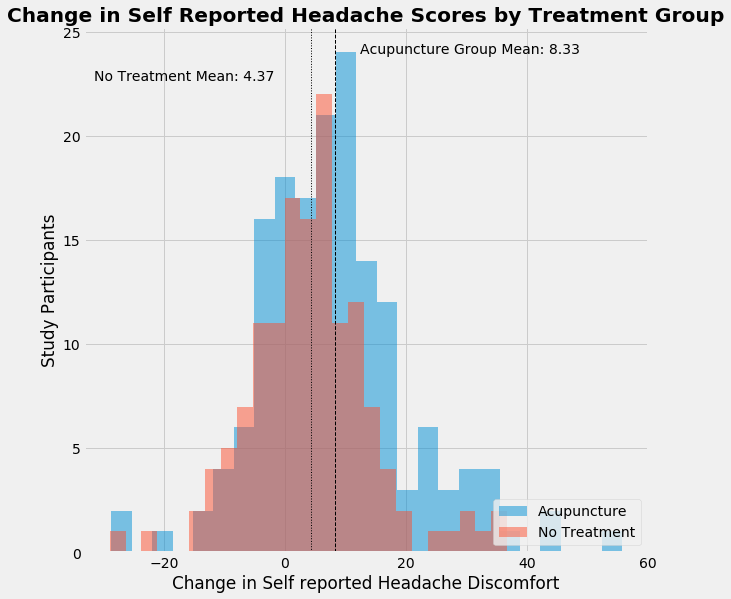

In [126]:
# Draw Graphic Visualizaing the differences in the mean between those in the acupuncture group and the no acupuncture group
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,9))
plt.title('Change in Self Reported Headache Scores by Treatment Group',fontdict={'fontweight':'bold'})
plt.hist(treatment, bins=25, alpha=0.5, label='Acupuncture')
plt.hist(control, bins=25, alpha=0.5, label='No Treatment')
plt.axvline(treatment.mean(), color='k',linestyle='dashed',linewidth=1)
plt.axvline(control.mean(), color='k',linestyle=':',linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(control.mean()-36, max_ylim*.9,f'No Treatment Mean: {round(control.mean(),2)}')
plt.text(treatment.mean()+4, max_ylim*.95,f'Acupuncture Group Mean: {round(treatment.mean(),2)}')
plt.xlabel('Change in Self reported Headache Discomfort',{'fontsize':'large'})
plt.ylabel('Study Participants',{'fontsize':'large'})
plt.legend(loc='lower right')
plt.show()

In [51]:
print(f'The mean improvement for those who received an acupucnture treatment was {round(treatment.mean(),2)} points.')

The mean improvement for those who received an acupucnture treatment was 8.33 points


In [52]:
print(f'The mean improvement for those who received an acupucnture treatment was {round(control.mean(),2)} points.')

The mean improvement for those who received an acupucnture treatment was 4.37 points.


### Because we have a continious, normal distribution we want to use the Fischer's T Test to compare the acupuncture vs. non-acupuncture groups

In [111]:
stats.ttest_ind(treatment,control)

Ttest_indResult(statistic=2.9320200339064502, pvalue=0.0036277299974949336)

### With a p-value of .003, we can reject the null hypotheses and state that there is a statistically significant difference in the reported headache relief between the acupuncture and control groups.

# Hypothesis Test 2 : Testing the difference in the number of sick days taken by participants in the accupuncture treatment group, and those in the control group

## Inspect variable for nulls and split into treatment and control groups

In [136]:
# Inspect the Dataset
df.head()

,id,age,sex,acupuncturist,group,migraine,chronicity,delta5,globaldelta,f1,f5,pf1,pf5,ef1,ef5,changeinpainmeds,totaldos
0,100,47,1,12,1,1,35,NaN,NaN,8.0,0.00,100.0,NaN,80.0,NaN,NaN,NaN
1,101,52,1,12,0,1,8,NaN,NaN,4.0,0.00,25.0,NaN,35.0,NaN,NaN,6.0
2,104,32,1,12,0,1,14,0.666667,NaN,12.0,13.33,95.0,100.0,60.0,65.0,21.0,3.0
3,105,53,1,9,0,1,10,NaN,NaN,21.0,0.00,85.0,NaN,55.0,NaN,NaN,NaN
4,108,56,1,9,0,1,40,-6.749999,NaN,14.0,15.00,70.0,55.0,20.0,15.0,5.0,23.0


In [139]:
# Separate observations into the treatment and control class

treatment = df.loc[((df['group']==1) & (df['totaldos'].isnull()==False)),'totaldos']
control =  df.loc[((df['group']==0) & (df['totaldos'].isnull()==False)),'totaldos']

## Check distribution of continous variable to determine which test to use

In [122]:
sickdays = df.loc[df['totaldos'].isnull()==False,'totaldos']

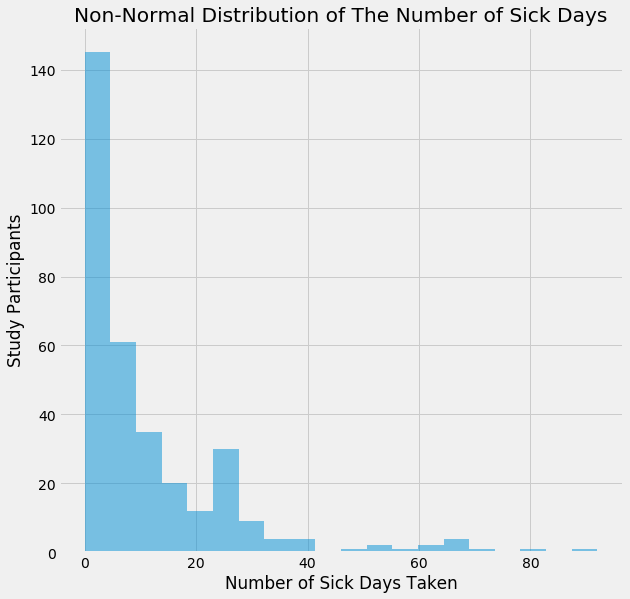

In [135]:
plt.figure(figsize=(9,9))
plt.title('Non-Normal Distribution of The Number of Sick Days')
plt.ylabel('Study Participants')
plt.xlabel('Number of Sick Days Taken')
plt.style.use('fivethirtyeight')
plt.hist(sickdays,bins=20,alpha=.5)
plt.show()

Non-normal distribution indicates we should use the Mann Whitney U Test for nonparametric comparison testing

## Compare Distributions and Means of Study Groups

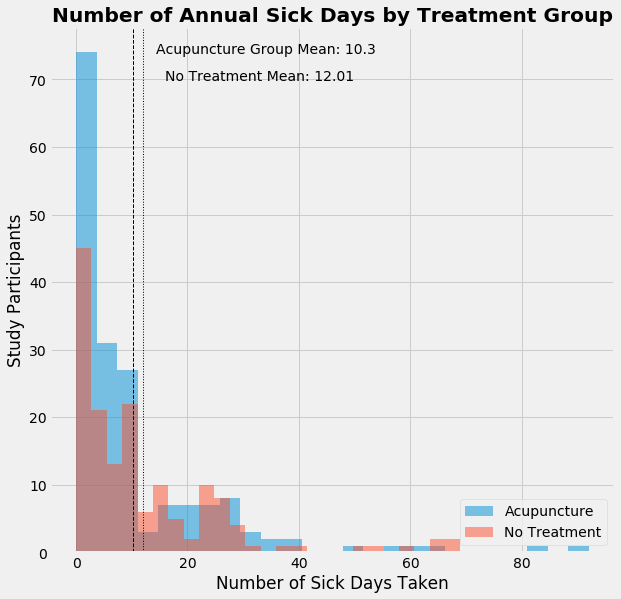

In [141]:
# Draw Graphic Visualizaing the differences in the mean between those in the acupuncture group and the no acupuncture group
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,9))
plt.title('Number of Annual Sick Days by Treatment Group',fontdict={'fontweight':'bold'})
plt.hist(treatment, bins=25, alpha=0.5, label='Acupuncture')
plt.hist(control, bins=25, alpha=0.5, label='No Treatment')
plt.axvline(treatment.mean(), color='k',linestyle='dashed',linewidth=1)
plt.axvline(control.mean(), color='k',linestyle=':',linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(control.mean()+4, max_ylim*.9,f'No Treatment Mean: {round(control.mean(),2)}')
plt.text(treatment.mean()+4, max_ylim*.95,f'Acupuncture Group Mean: {round(treatment.mean(),2)}')
plt.xlabel('Number of Sick Days Taken',{'fontsize':'large'})
plt.ylabel('Study Participants',{'fontsize':'large'})
plt.legend(loc='lower right')
plt.show()

### Because we have a continious, right-skewed distribution we want to use the Mann Whitney U Test to compare the acupuncture vs. non-acupuncture groups

In [142]:
stats.mannwhitneyu(treatment,control)

MannwhitneyuResult(statistic=12325.0, pvalue=0.045016962322660489)

### At the 95% confidence interval we can reject the null hypotheses and state that there is a significant difference between the accupuncture  and control populations that is not due to chance. 